## Import Python Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Checking missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Checking the dtypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Exploratory Data Analysis

In [5]:
#describe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


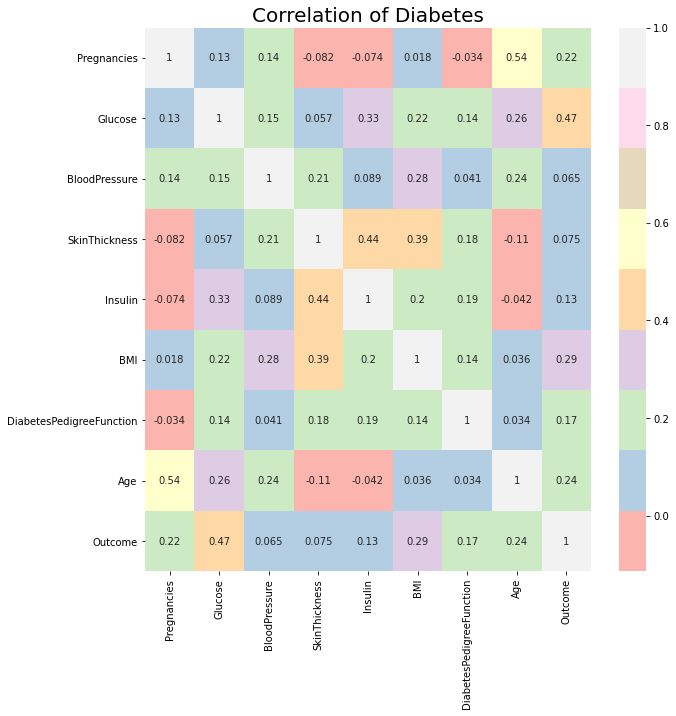

In [6]:
# Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           annot=True,
           cmap='Pastel1')
plt.title('Correlation of Diabetes', fontsize=20);

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

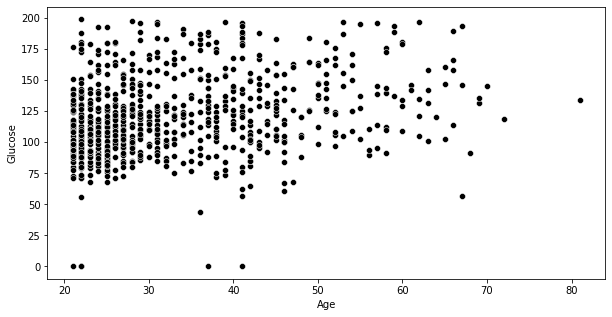

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Age', y='Glucose', color='Black')


<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

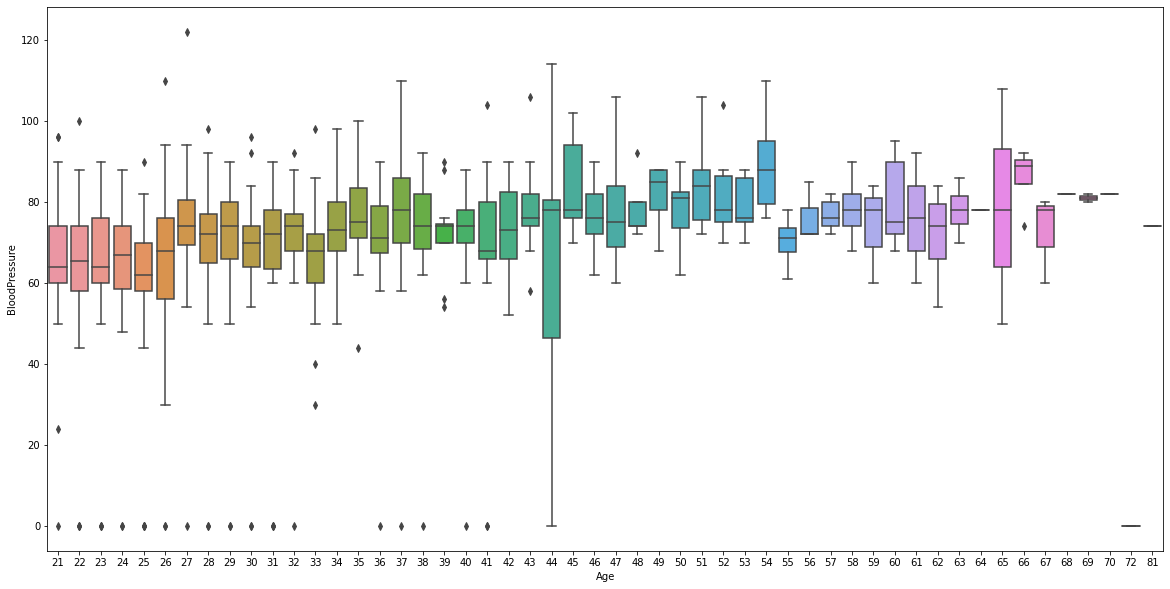

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='Age', y='BloodPressure')

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

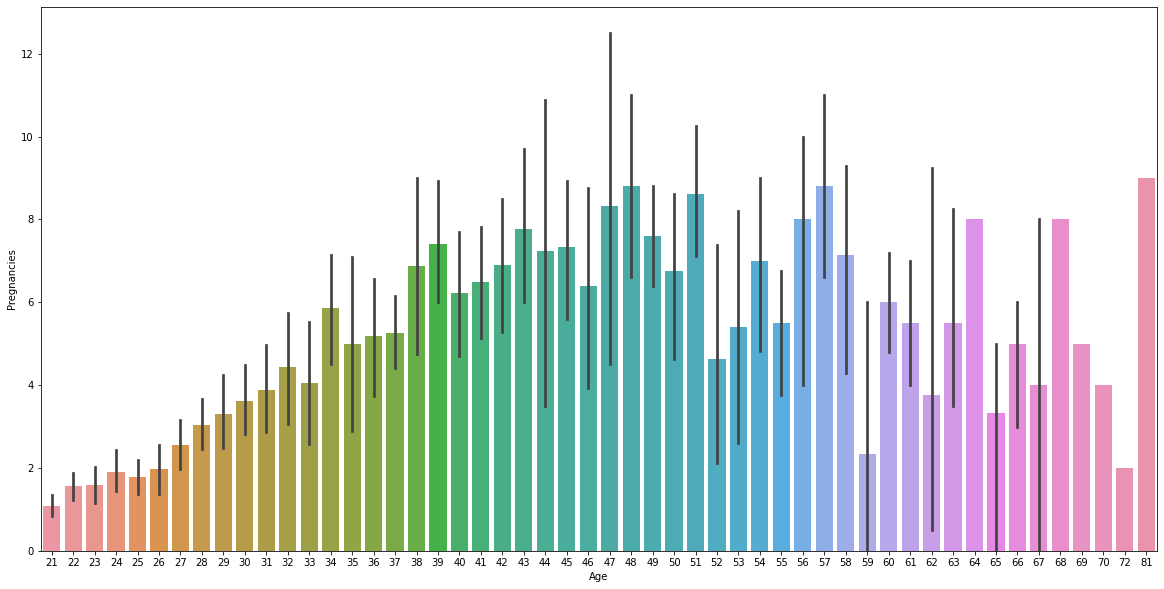

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Age', y='Pregnancies')

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

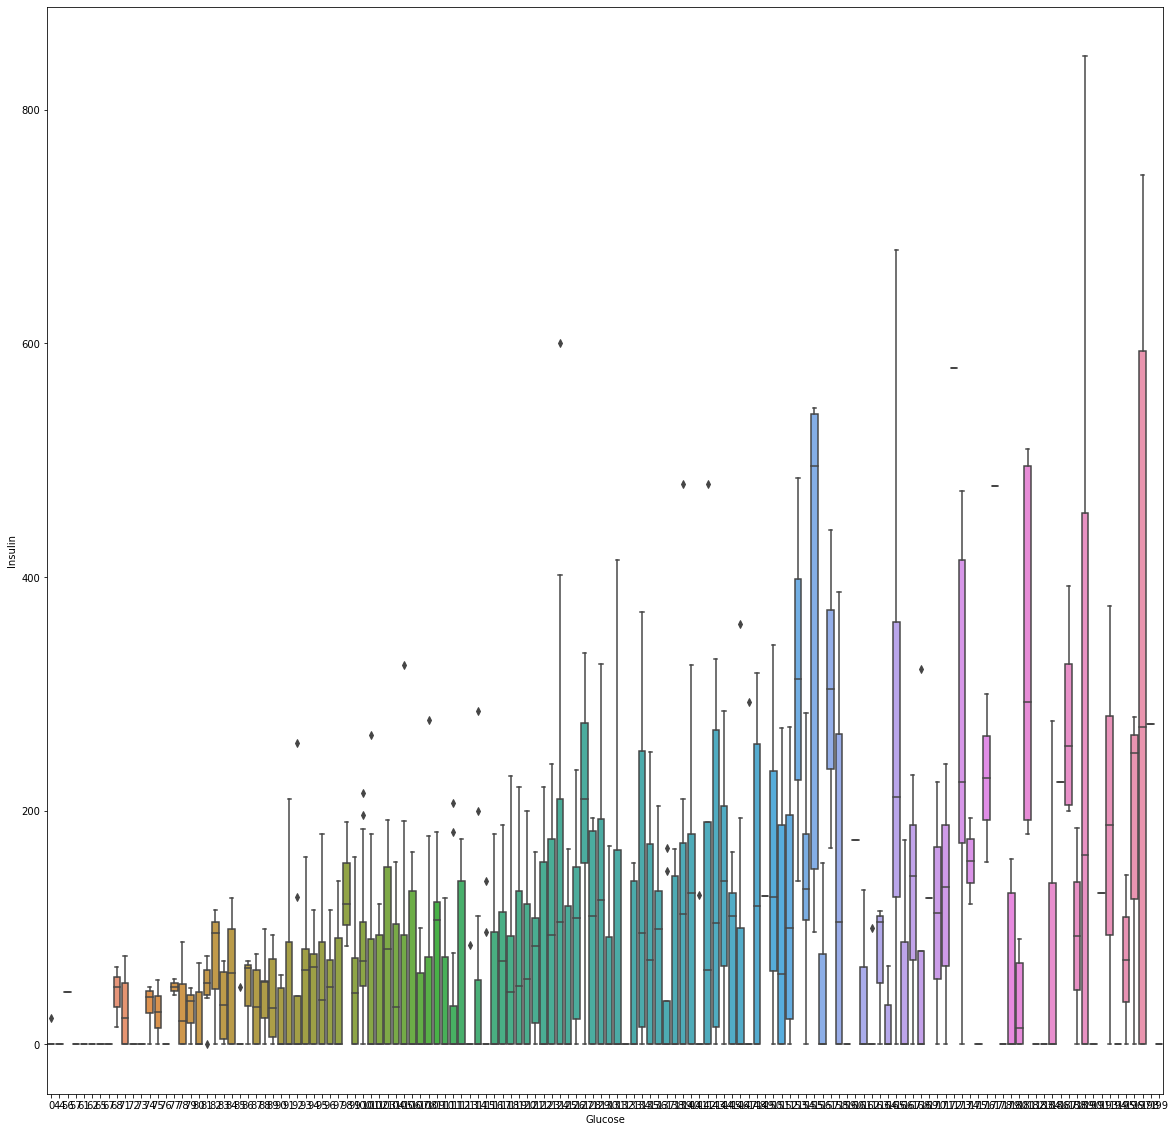

In [11]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df, x='Glucose', y='Insulin')

<Figure size 720x720 with 0 Axes>

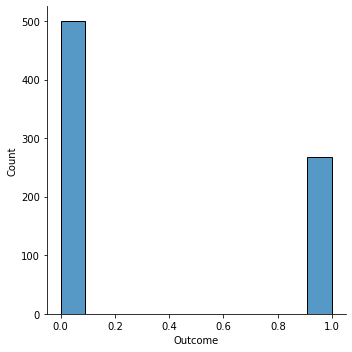

In [12]:
plt.figure(figsize=(10,10))
sns.displot(df['Outcome'])

### Modelling

#### split the dataset

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(614, 154, 614, 154)

### Logistic Regression

 Score : 0.8311688311688312
********************
 Accuracy_score : 83.12%
 Precision_score : 0.8260869565217391
 Recall_score : 0.6785714285714286
 F1_score  : 0.7450980392156864
********************
 Classification_report :               precision    recall  f1-score   support

           0       0.83      0.92      0.87        98
           1       0.83      0.68      0.75        56

    accuracy                           0.83       154
   macro avg       0.83      0.80      0.81       154
weighted avg       0.83      0.83      0.83       154



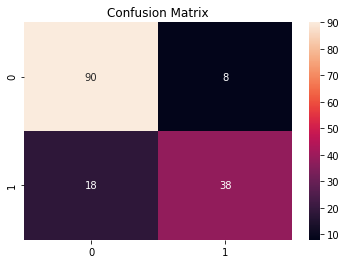

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

print(f" Score : {lr.score(X_test, y_test)}")
print("*"*20)
print(f" Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f" Precision_score : {precision_score(y_test, y_preds)}")
print(f" Recall_score : {recall_score(y_test, y_preds)}")
print(f" F1_score  : {f1_score(y_test, y_preds)}")
print("*" * 20)
print(f" Classification_report : {classification_report(y_test, y_preds)}")

sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True)
plt.title("Confusion Matrix");

### RandomForestClassifier

 Score : 0.7987012987012987
********************
 Accuracy_score : 79.87%
 Precision_score : 0.7272727272727273
 Recall_score : 0.7142857142857143
 F1_score  : 0.7207207207207208
********************
 Classification_report :               precision    recall  f1-score   support

           0       0.84      0.85      0.84        98
           1       0.73      0.71      0.72        56

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



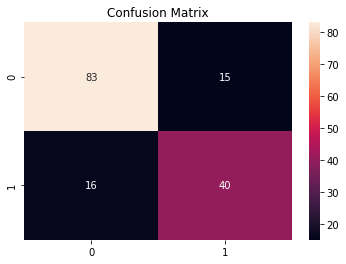

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

print(f" Score : {rf.score(X_test, y_test)}")
print("*"*20)
print(f" Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f" Precision_score : {precision_score(y_test, y_preds)}")
print(f" Recall_score : {recall_score(y_test, y_preds)}")
print(f" F1_score  : {f1_score(y_test, y_preds)}")
print("*" * 20)
print(f" Classification_report : {classification_report(y_test, y_preds)}")

sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True)
plt.title("Confusion Matrix");

### GradientBoostingClassifier

 Score : 0.7597402597402597
********************
 Accuracy_score : 75.97%
 Precision_score : 0.6666666666666666
 Recall_score : 0.6785714285714286
 F1_score  : 0.6725663716814159
********************
 Classification_report :               precision    recall  f1-score   support

           0       0.81      0.81      0.81        98
           1       0.67      0.68      0.67        56

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



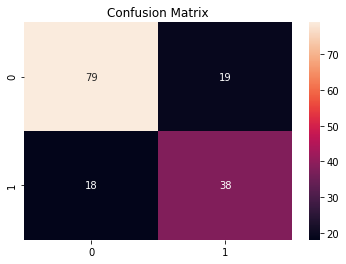

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_preds = gb.predict(X_test)

print(f" Score : {gb.score(X_test, y_test)}")
print("*"*20)
print(f" Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f" Precision_score : {precision_score(y_test, y_preds)}")
print(f" Recall_score : {recall_score(y_test, y_preds)}")
print(f" F1_score  : {f1_score(y_test, y_preds)}")
print("*" * 20)
print(f" Classification_report : {classification_report(y_test, y_preds)}")

sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True)
plt.title("Confusion Matrix");

### KNN

 Score : 0.7337662337662337
********************
 Accuracy_score : 73.38%
 Precision_score : 0.6666666666666666
 Recall_score : 0.5357142857142857
 F1_score  : 0.594059405940594
********************
 Classification_report :               precision    recall  f1-score   support

           0       0.76      0.85      0.80        98
           1       0.67      0.54      0.59        56

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



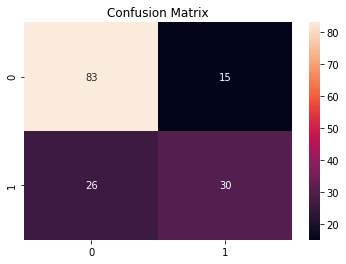

In [17]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)

print(f" Score : {knn.score(X_test, y_test)}")
print("*"*20)
print(f" Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f" Precision_score : {precision_score(y_test, y_preds)}")
print(f" Recall_score : {recall_score(y_test, y_preds)}")
print(f" F1_score  : {f1_score(y_test, y_preds)}")
print("*" * 20)
print(f" Classification_report : {classification_report(y_test, y_preds)}")

sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True)
plt.title("Confusion Matrix");

### LinearSVC

 Score : 0.6493506493506493
********************
 Accuracy_score : 64.94%
 Precision_score : 0.5161290322580645
 Recall_score : 0.5714285714285714
 F1_score  : 0.5423728813559322
********************
 Classification_report :               precision    recall  f1-score   support

           0       0.74      0.69      0.72        98
           1       0.52      0.57      0.54        56

    accuracy                           0.65       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.65      0.65       154



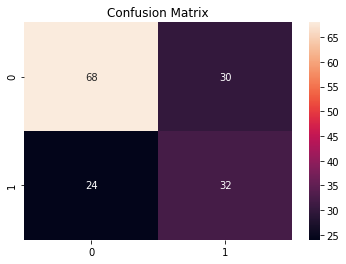

In [18]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)
y_preds = svc.predict(X_test)

print(f" Score : {svc.score(X_test, y_test)}")
print("*"*20)
print(f" Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f" Precision_score : {precision_score(y_test, y_preds)}")
print(f" Recall_score : {recall_score(y_test, y_preds)}")
print(f" F1_score  : {f1_score(y_test, y_preds)}")
print("*" * 20)
print(f" Classification_report : {classification_report(y_test, y_preds)}")

sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True)
plt.title("Confusion Matrix");

In [19]:
# logistic regression gave best accuracy
y_preds = lr.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])